# Data Analysis and Visualization: Demographic Trends in Kyrgyzstan

## Introduction

This project aims to analyze and visualize key demographic trends in Kyrgyzstan, including birth and death rates, natural population growth, marriage and divorce statistics, and overall population dynamics across various regions from 2012 to 2024.

The primary objectives are:
- To explore the natural growth of the population across different regions.
- To examine the stability of family structures through marriage and divorce trends.
- To assess the relationship between demographic indicators such as population size and natural growth rates.
- To identify anomalies (e.g., the impact of the COVID-19 pandemic) and interpret regional patterns.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

The data used for this analysis was sourced from official open data platforms, including national statistics databases. Several datasets were merged and cleaned to create two main dataframes:

- **Combined Demographic Data (2012–2023)**: Includes births, deaths, natural increase, and population by region and year.
- **Marriage and Divorce Data (2020–2024)**: Includes the number of marriages and divorces by region and year.

Additional calculated indicators:
- **Natural Growth Rate (%)** = (Natural Increase / Population) × 100
- **Marriage Stability Index** = Marriages - Divorces
- **Birth-Death Difference** = Births - Deaths


In [4]:
# === 2. Загрузка файлов ===
births_df = pd.read_excel('число_родившихся.xlsx')
deaths_df = pd.read_excel('число_умерших.xlsx')
natural_increase_df = pd.read_excel('естественный_прирост_населения.xlsx')
population_start_df = pd.read_excel('численность_постоянного_населения_на_начало_года.xlsx')
marriages_df = pd.read_excel('marriages_kg.xlsx')
divorces_df = pd.read_excel('divorces_kg.xlsx')


In [5]:
population_start_df

,Туруктуу калктын саны жылдын башына карата1,Численность постоянного населения на начало года1,Resident population as of the beginning of the year1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,(миң адам),(тыс. человек),(thous. people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Көрсөткүчтөрдүн аталыштары,Наименование показателей,Items,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2025.0
2,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,5590.1,5714.1,5840.2,5971.5,6108.6,6242.1,6371.3,6516.8,6663.6,6789.6,6912.9,7037.6,7161.9,7281.8
3,Баткен облусу,Баткенская область,Batken Region,449.0,459.1,470.0,481.1,493.0,504.0,514.2,525.7,538.1,549.0,559.5,570.9,583.4,594.7
4,Жалал-Абад облусу,Джалал-Абадская область,Jalal-Abad Region,1055.7,1078.6,1101.6,1125.3,1149.9,1172.6,1194.9,1219.2,1244.0,1266.3,1288.4,1311.0,1335.8,1358.5
5,Ысык-Көл облусу,Иссык-Кульская область,Issyk-Kul Region,454.4,462.0,469.2,476.8,485.1,493.9,502.3,511.2,519.6,527.7,533.8,538.4,544.4,549.8
6,Нарын облусу,Нарынская область,Naryn Region,267.8,271.8,276.0,280.2,284.2,288.5,292.3,296.4,299.9,303.4,306.5,308.4,312.1,314.9
7,Ош облусу,Ошская область,Osh Region,1152.5,1179.6,1207.9,1237.9,1270.9,1300.3,1328.4,1357.9,1385.7,1410.8,1435.5,1460.4,1490.1,1514.9
8,Талас облусу,Таласская область,Talas Region,234.5,238.4,241.9,245.5,249.3,252.9,256.4,260.6,264.2,267.6,270.3,273.5,277.1,280.5
9,Чүй облусу,Чуйская область,Chui Region,838.5,859.6,880.3,902.2,924.6,947.7,969.5,994.2,1018.3,1038.7,1054.5,1068.7,1086.8,1102.1


In [6]:
deaths_df

,Өлгөндөрдүн саны,Число умерших,The number of deaths,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,(адам),(человек),(people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Көрсөткүчтөрдүн аталыштары,Наименование показателей,Items,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,35941.0,36186.0,34880.0,35564.0,34808.0,33475.0,33166.0,32989.0,33295.0,39977.0,38875.0,31401.0,31500.0,31710.0
4,Баткен облусу,Баткенская область,Batken Region,2580.0,2690.0,2469.0,2480.0,2539.0,2525.0,2377.0,2359.0,2357.0,2881.0,2753.0,2314.0,2303.0,2296.0
5,Жалал-Абад облусу,Джалал-Абадская область,Jalal-Abad Region,5928.0,5962.0,5716.0,5984.0,6021.0,5700.0,5621.0,5485.0,5687.0,6754.0,6698.0,5494.0,5436.0,5582.0
6,Ысык-Көл облусу,Иссык-Кульская область,Issyk-Kul Region,3539.0,3714.0,3595.0,3446.0,3448.0,3199.0,3245.0,3206.0,3259.0,3860.0,3911.0,2990.0,2876.0,2957.0
7,Нарын облусу,Нарынская область,Naryn Region,2130.0,2081.0,2070.0,2047.0,2036.0,1961.0,1881.0,1895.0,1925.0,2122.0,2113.0,1537.0,1681.0,1764.0
8,Ош облусу,Ошская область,Osh Region,6267.0,6317.0,6056.0,6250.0,6250.0,5859.0,5880.0,5749.0,5841.0,7273.0,6179.0,5508.0,5595.0,5412.0
9,Талас облусу,Таласская область,Talas Region,1545.0,1541.0,1501.0,1561.0,1457.0,1438.0,1394.0,1377.0,1432.0,1813.0,1636.0,1307.0,1351.0,1263.0


In [7]:
marriages_df

,Region,2020,2021,2022,2023,2024
0,Кыргызская Республика,39747,50747,48232,45495,45033
1,Баткенская область,3394,4370,4850,4398,3977
2,Джалал-Абадская область,7952,9263,9403,9199,9024
3,Ыссык-Кульская область,2842,3538,3848,3721,3650
4,Нарынская область,1605,1722,2523,2334,2394
5,Ошская область,8515,9610,10924,10097,10131
6,Таласская область,1487,1729,2121,2003,1912
7,Чуйская область,5525,6498,7698,6965,6995
8,г. Бишкек,6693,10852,4854,4851,4965
9,г. Ош,1734,2795,2011,1987,1985


In [8]:
print(births_df.head(20))

           Төрөлгөндөрдүн саны          Число родившихся The number of births  \
0                       (адам)                 (человек)             (people)   
1                          NaN                       NaN                  NaN   
2   Көрсөткүчтөрдүн аталыштары  Наименование показателей                Items   
3          Кыргыз Республикасы     Кыргызская Республика      Kyrgyz Republic   
4                Баткен облусу        Баткенская область       Batken  Region   
5            Жалал-Абад облусу   Джалал-Абадская область    Jalal-Abad Region   
6              Ысык-Көл облусу    Иссык-Кульская область     Issyk-Kul Region   
7                 Нарын облусу         Нарынская область         Naryn Region   
8                    Ош облусу            Ошская область           Osh Region   
9                 Талас облусу         Таласская область         Talas Region   
10                 Чүй облусу            Чуйская область          Chui Region   
11                   Бишкек 

In [9]:
import pandas as pd

# === Словарь перевода регионов ===
region_translation = {
    'Кыргызская Республика': 'Kyrgyz Republic',
    'Баткенская область': 'Batken Region',
    'Баткен облусу': 'Batken Region',
    'Джалал-Абадская область': 'Jalal-Abad Region',
    'Жалал-Абад облусу': 'Jalal-Abad Region',
    'Иссык-Кульская область': 'Issyk-Kul Region',
    'Ысык-Көл облусу': 'Issyk-Kul Region',
    'Нарынская область': 'Naryn Region',
    'Нарын облусу': 'Naryn Region',
    'Ошская область': 'Osh Region',
    'Ош облусу': 'Osh Region',
    'Таласская область': 'Talas Region',
    'Талас облусу': 'Talas Region',
    'Чуйская область': 'Chui Region',
    'Чүй облусу': 'Chui Region',
    'г.Бишкек': 'Bishkek City',
    'г.Ош': 'Osh City'
}

# === Функция для стандартных файлов (Births, Deaths, Natural Increase) ===
def clean_standard_file(filepath):
    df = pd.read_excel(filepath)
    df = df.iloc[2:].reset_index(drop=True)
    df = df.iloc[:, 2:]
    new_columns = ['Region'] + list(df.iloc[0, 1:].astype(int))
    df.columns = new_columns
    df = df.iloc[1:].reset_index(drop=True)
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# === Чистим Births, Deaths, Natural Increase ===
births_clean = clean_standard_file('число_родившихся.xlsx')
deaths_clean = clean_standard_file('число_умерших.xlsx')
natural_increase_clean = clean_standard_file('естественный_прирост_населения.xlsx')

# === Чистим Population ===
population_df = pd.read_excel('численность_постоянного_населения_на_начало_года.xlsx')
population_df = population_df.iloc[2:].reset_index(drop=True)
population_df = population_df.iloc[:, [2] + list(range(4, 16))]
population_df.columns = ['Region', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
population_df = population_df[population_df['Region'].notna()]
population_df = population_df[~population_df['Region'].astype(str).str.contains('Data are recalculated', na=False)]
population_clean = population_df.melt(id_vars='Region', var_name='Year', value_name='Population')
population_clean['Year'] = population_clean['Year'].astype(int)

# === Чистим Marriages ===
marriages_df = pd.read_excel('marriages_kg.xlsx')
marriages_df = marriages_df.iloc[2:].reset_index(drop=True)
marriages_df.columns = ['Region', 2020, 2021, 2022, 2023, 2024]
marriages_df = marriages_df[marriages_df['Region'].notna()]
marriages_df['Region'] = marriages_df['Region'].replace(region_translation)
marriages_clean = marriages_df.melt(id_vars='Region', var_name='Year', value_name='Marriages')
marriages_clean['Year'] = marriages_clean['Year'].astype(int)

# === Чистим Divorces ===
divorces_df = pd.read_excel('divorces_kg.xlsx')
divorces_df = divorces_df.iloc[2:].reset_index(drop=True)
divorces_df.columns = ['Region', 2020, 2021, 2022, 2023, 2024]
divorces_df = divorces_df[divorces_df['Region'].notna()]
divorces_df['Region'] = divorces_df['Region'].replace(region_translation)
divorces_clean = divorces_df.melt(id_vars='Region', var_name='Year', value_name='Divorces')
divorces_clean['Year'] = divorces_clean['Year'].astype(int)

# === Приводим Births, Deaths, Natural Increase к длинному виду ===
births_melted = births_clean.melt(id_vars='Region', var_name='Year', value_name='Births')
deaths_melted = deaths_clean.melt(id_vars='Region', var_name='Year', value_name='Deaths')
natural_increase_melted = natural_increase_clean.melt(id_vars='Region', var_name='Year', value_name='Natural_Increase')

# === Объединяем Births + Deaths + Natural Increase + Population ===
combined_df = pd.merge(births_melted, deaths_melted, on=['Region', 'Year'], how='outer')
combined_df = pd.merge(combined_df, natural_increase_melted, on=['Region', 'Year'], how='outer')
combined_df = pd.merge(combined_df, population_clean, on=['Region', 'Year'], how='outer')

# === Оставляем только года 2012–2023 ===
combined_df = combined_df[(combined_df['Year'] >= 2012) & (combined_df['Year'] <= 2023)]

# === Теперь обрабатываем Marriages и Divorces отдельно ===
marriages_divorces_df = pd.merge(marriages_clean, divorces_clean, on=['Region', 'Year'], how='outer')

# === Выводим результаты ===
print("Combined DataFrame (2012–2023):")
print(combined_df.head(), '\n')

print("Marriages and Divorces (2020–2024):")
print(marriages_divorces_df.head())


Combined DataFrame (2012–2023):
           Region  Year   Births  Deaths  Natural_Increase  Population
1  Batken  Region  2012  13800.0  2690.0           11110.0       459.1
2  Batken  Region  2013  14294.0  2469.0           11825.0       470.0
3  Batken  Region  2014  14722.0  2480.0           12242.0       481.1
4  Batken  Region  2015  15330.0  2539.0           12791.0       493.0
5  Batken  Region  2016  14325.0  2525.0           11800.0       504.0 

Marriages and Divorces (2020–2024):
        Region  Year  Marriages  Divorces
0  Chui Region  2020       5525      1613
1  Chui Region  2021       6498      2128
2  Chui Region  2022       7698      2199
3  Chui Region  2023       6965      2284
4  Chui Region  2024       6995      2309


In [10]:
# Сохраняем combined_df
combined_df.to_excel('combined_data_2012_2023.xlsx', index=False)

# Сохраняем marriages_divorces_df
marriages_divorces_df.to_excel('marriages_divorces_2020_2024.xlsx', index=False)

In [11]:
# === 1. Общая информация по combined_df ===
print("Combined DataFrame Info:")
print(combined_df.info(), '\n')

# === 2. Статистики по численным столбцам ===
print("Combined DataFrame Descriptive Statistics:")
print(combined_df.describe(), '\n')

# === 3. Проверка пропущенных данных ===
print("Missing Values in Combined DataFrame:")
print(combined_df.isnull().sum(), '\n')

# === 4. Статистики по Marriages/Divorces ===
print("Marriages and Divorces DataFrame Info:")
print(marriages_divorces_df.info(), '\n')

print("Marriages and Divorces Descriptive Statistics:")
print(marriages_divorces_df.describe(), '\n')

print("Missing Values in Marriages and Divorces:")
print(marriages_divorces_df.isnull().sum(), '\n')

# === 5. Тренды по стране (только Kyrgyz Republic) ===
kyrgyz_df = combined_df[combined_df['Region'] == 'Kyrgyz Republic']

print("Kyrgyz Republic Trends:")
print(kyrgyz_df)

# (Если нужно — сразу можно построить графики трендов тут)


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 1 to 138
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            120 non-null    object 
 1   Year              120 non-null    object 
 2   Births            120 non-null    float64
 3   Deaths            120 non-null    float64
 4   Natural_Increase  120 non-null    float64
 5   Population        120 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.6+ KB
None 

Combined DataFrame Descriptive Statistics:
             Births        Deaths  Natural_Increase   Population
count     120.00000    120.000000        120.000000   120.000000
mean    31609.90000   6935.266667      24674.633333  1288.836667
std     43496.47042   9510.119174      34125.904435  1773.892161
min      4734.00000   1307.000000       2977.000000   238.400000
25%      7637.75000   2026.750000       5771.000000   312.400000
50%     

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Расчёт новых показателей
combined_df['Natural_Growth_Rate'] = (combined_df['Natural_Increase'] / combined_df['Population']) * 100
combined_df['Birth_Death_Diff'] = combined_df['Births'] - combined_df['Deaths']
marriages_divorces_df['Marriage_Stability_Index'] = marriages_divorces_df['Marriages'] - marriages_divorces_df['Divorces']

# --- 2. Проверяем что всё рассчитано
print(combined_df[['Region', 'Year', 'Natural_Growth_Rate', 'Birth_Death_Diff']].head())
print(marriages_divorces_df[['Region', 'Year', 'Marriage_Stability_Index']].head())


           Region  Year  Natural_Growth_Rate  Birth_Death_Diff
1  Batken  Region  2012          2419.952080           11110.0
2  Batken  Region  2013          2515.957447           11825.0
3  Batken  Region  2014          2544.585325           12242.0
4  Batken  Region  2015          2594.523327           12791.0
5  Batken  Region  2016          2341.269841           11800.0
        Region  Year  Marriage_Stability_Index
0  Chui Region  2020                      3912
1  Chui Region  2021                      4370
2  Chui Region  2022                      5499
3  Chui Region  2023                      4681
4  Chui Region  2024                      4686


# Data Visualization

## Figure 1: Population Distribution by Region (2023)

This chart shows the distribution of the population across different regions of Kyrgyzstan for the year 2023. It highlights significant differences between urban centers like Bishkek and Osh and more rural regions. The data reflects trends of urbanization, where a growing portion of the population concentrates in major cities.

---

## Figure 2: Births and Deaths in Kyrgyz Republic (2012–2023)

The line graph presents the dynamics of births and deaths in the Kyrgyz Republic over the period from 2012 to 2023. A notable fluctuation is observed around 2020, with deaths increasing sharply due to the COVID-19 pandemic, while births show a slight decline during the same period. Overall, births consistently outnumber deaths, indicating positive natural population growth.

---

## Figure 3: Marriages and Divorces in Kyrgyzstan (2020–2024)

This chart illustrates the trends in marriages and divorces across the country from 2020 to 2024. A temporary drop in marriages and a slight increase in divorces can be seen during the pandemic period (2020–2021), reflecting social instability. Post-pandemic years show partial recovery in marriage rates but continued high divorce rates in some regions.

--------

## Figure 4: Natural Growth Rate by Region (2012–2023)

The chart illustrates the natural growth rate (percentage of natural population increase relative to total population) across different regions in Kyrgyzstan. A notable dip around 2020 can be observed, likely linked to the COVID-19 pandemic, which affected both birth and death rates.

---

## Figure 5: Difference Between Births and Deaths by Region (2012–2023)

This graph shows the numerical difference between births and deaths for each region over time. A sharp decrease is visible in 2020 across most regions, highlighting the impact of the pandemic on mortality and fertility trends.

---

## Figure 6: Marriage Stability Index by Region (2020–2024)

The Marriage Stability Index, calculated as the difference between the number of marriages and divorces, provides insights into family stability in different regions. Some regions exhibit greater family cohesion, while others show relatively higher divorce rates, especially during the post-pandemic period.

---

## Figure 7: Relationship between Population and Natural Growth Rate

The scatter plot with a regression line demonstrates a weak positive correlation between population size and natural growth rate. Larger regions tend to experience slightly higher natural growth percentages, although the relationship is not strictly linear.

---

## Figure 8: Correlation Matrix: Population vs Natural Growth Rate

The heatmap visualizes the correlation between population and natural growth rate across regions. The moderate correlation suggests that population size may influence natural growth dynamics, but other regional factors also play significant roles.


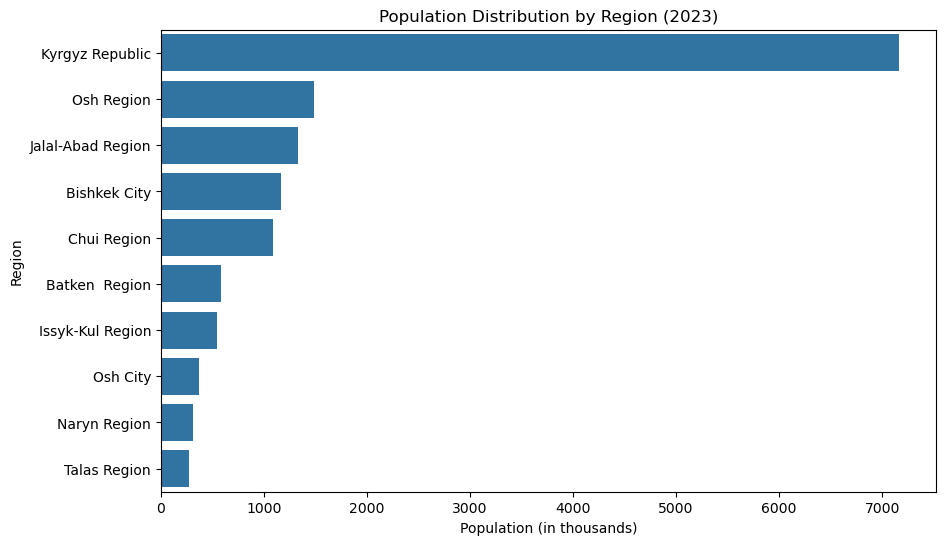

In [14]:
# Распределение населения в 2023 году
pop_2023 = combined_df[(combined_df['Year'] == 2023)]

plt.figure(figsize=(10,6))
sns.barplot(x='Population', y='Region', data=pop_2023.sort_values(by='Population', ascending=False))
plt.title('Population Distribution by Region (2023)')
plt.xlabel('Population (in thousands)')
plt.ylabel('Region')
plt.show()


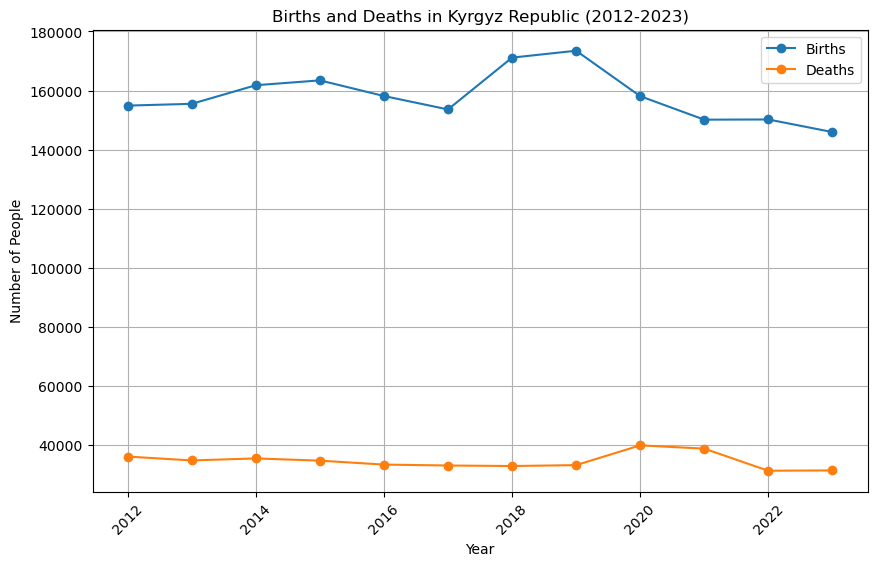

In [15]:
kyrgyz_df = combined_df[combined_df['Region'] == 'Kyrgyz Republic']

plt.figure(figsize=(10,6))
plt.plot(kyrgyz_df['Year'], kyrgyz_df['Births'], marker='o', label='Births')
plt.plot(kyrgyz_df['Year'], kyrgyz_df['Deaths'], marker='o', label='Deaths')
plt.title('Births and Deaths in Kyrgyz Republic (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

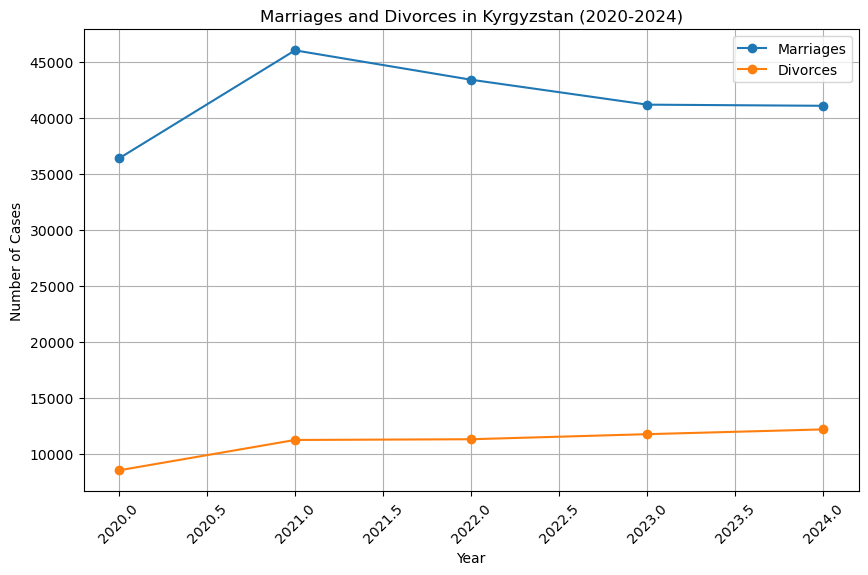

In [16]:
marriage_total = marriages_divorces_df.groupby('Year')['Marriages'].sum().reset_index()
divorce_total = marriages_divorces_df.groupby('Year')['Divorces'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(marriage_total['Year'], marriage_total['Marriages'], marker='o', label='Marriages')
plt.plot(divorce_total['Year'], divorce_total['Divorces'], marker='o', label='Divorces')
plt.title('Marriages and Divorces in Kyrgyzstan (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


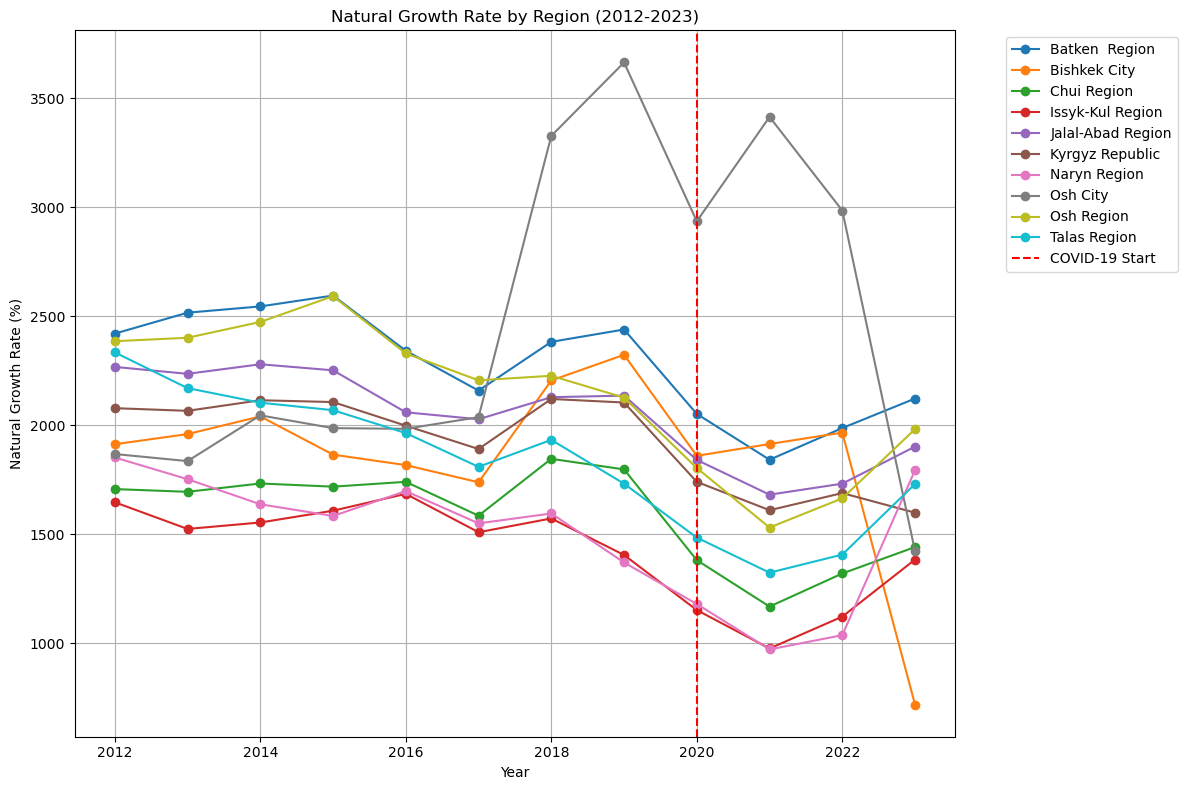

In [17]:
plt.figure(figsize=(12,8))
for region in combined_df['Region'].unique():
    region_data = combined_df[combined_df['Region'] == region]
    plt.plot(region_data['Year'], region_data['Natural_Growth_Rate'], marker='o', label=region)

plt.axvline(x=2020, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Natural Growth Rate by Region (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Natural Growth Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


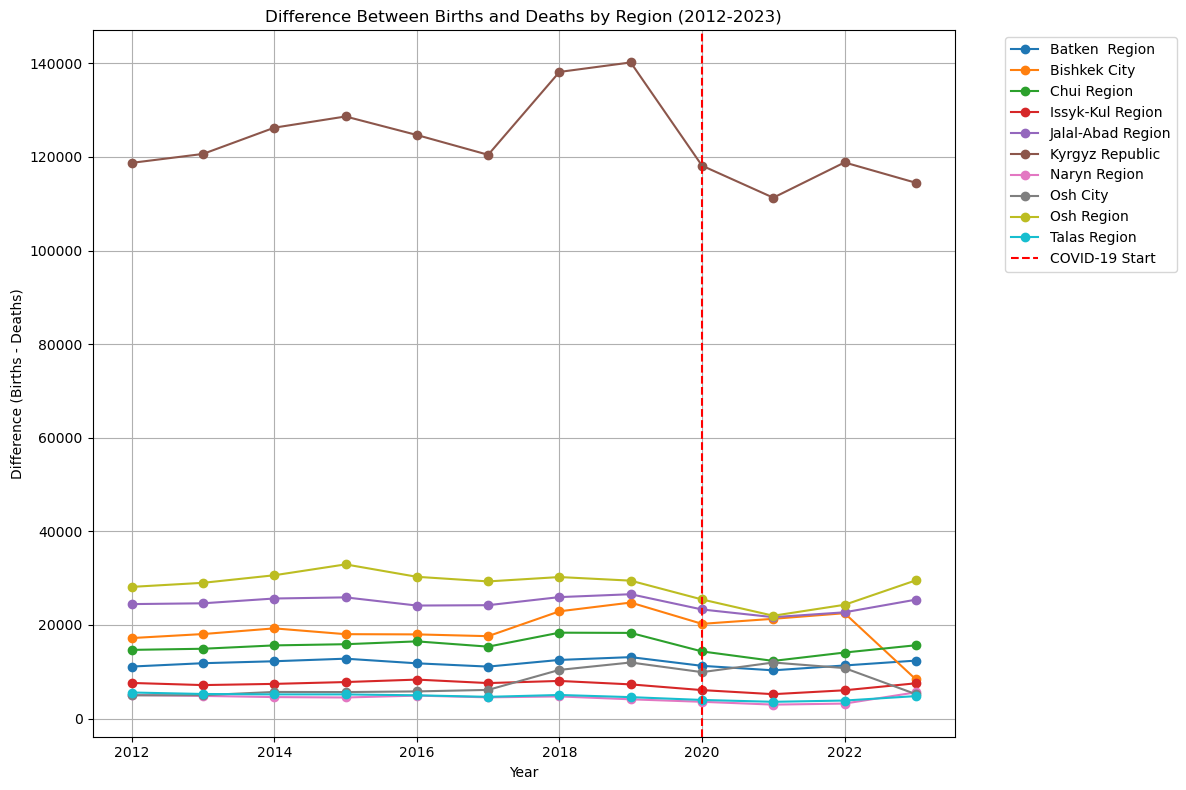

In [18]:
plt.figure(figsize=(12,8))
for region in combined_df['Region'].unique():
    region_data = combined_df[combined_df['Region'] == region]
    plt.plot(region_data['Year'], region_data['Birth_Death_Diff'], marker='o', label=region)

plt.axvline(x=2020, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Difference Between Births and Deaths by Region (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Difference (Births - Deaths)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The chart illustrates the natural growth rate (percentage of natural population increase relative to total population) across different regions in Kyrgyzstan. A notable dip around 2020 can be observed, likely linked to the COVID-19 pandemic, which affected both birth and death rates.

This graph shows the numerical difference between births and deaths for each region over time. A sharp decrease is visible in 2020 across most regions, highlighting the impact of the pandemic on mortality and fertility trends

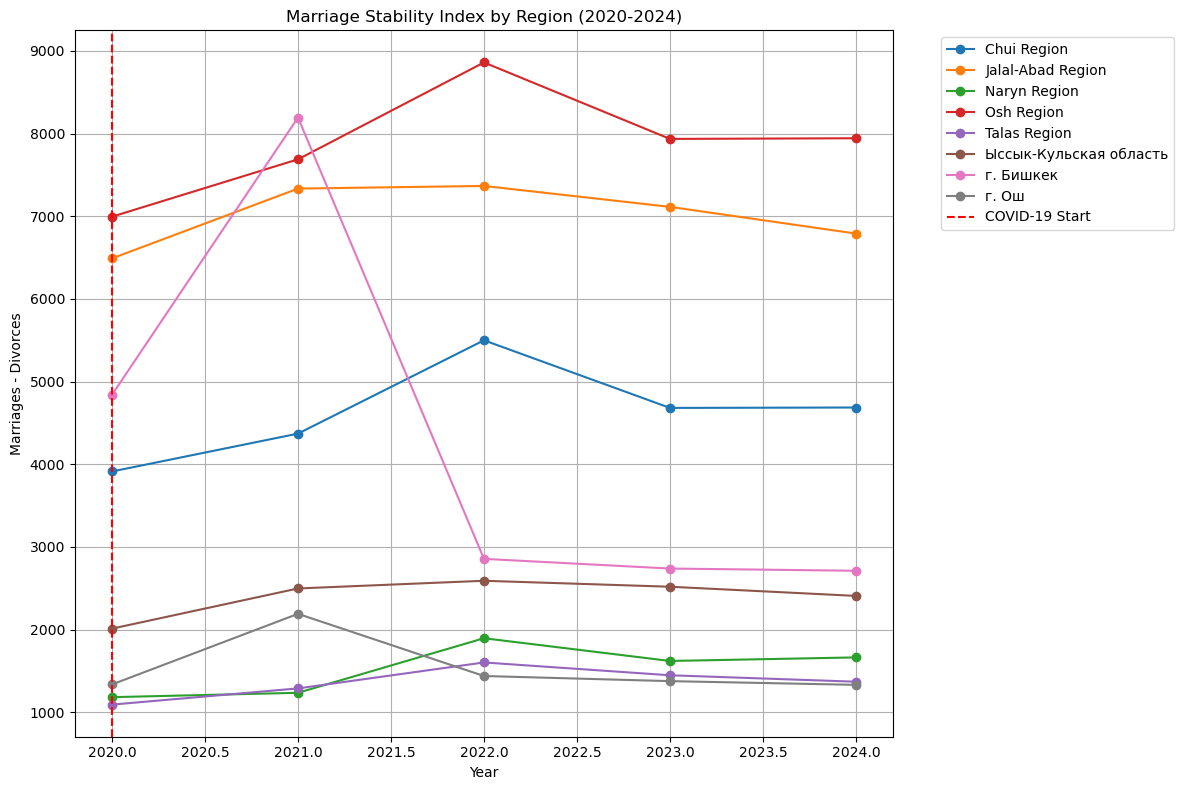

In [21]:
plt.figure(figsize=(12,8))
for region in marriages_divorces_df['Region'].unique():
    region_data = marriages_divorces_df[marriages_divorces_df['Region'] == region]
    plt.plot(region_data['Year'], region_data['Marriage_Stability_Index'], marker='o', label=region)

plt.axvline(x=2020, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Marriage Stability Index by Region (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Marriages - Divorces')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The Marriage Stability Index, calculated as the difference between the number of marriages and divorces, provides insights into family stability in different regions. Some regions exhibit greater family cohesion, while others show relatively higher divorce rates, especially during the post-pandemic period.

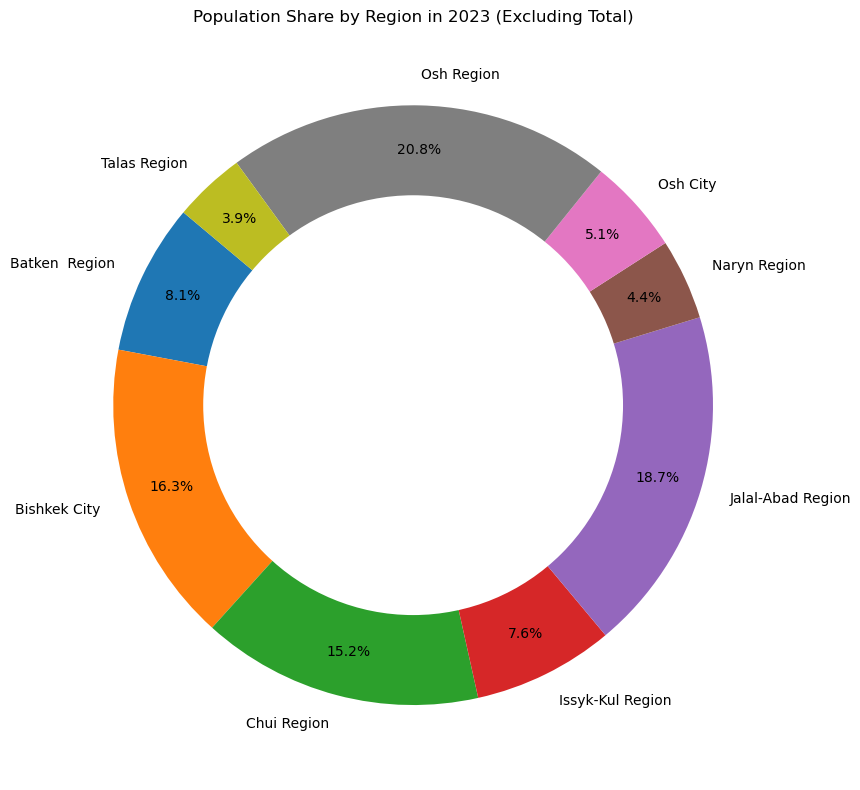

In [23]:
import matplotlib.pyplot as plt

# Фильтруем данные на 2023 год
population_2023 = combined_df[(combined_df['Year'] == 2023)]

# Убираем строку "Kyrgyz Republic"
population_2023 = population_2023[population_2023['Region'] != 'Kyrgyz Republic']

# Строим pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    population_2023['Population'],
    labels=population_2023['Region'],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)
# Круглый стиль
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Population Share by Region in 2023 (Excluding Total)')
plt.tight_layout()
plt.show()



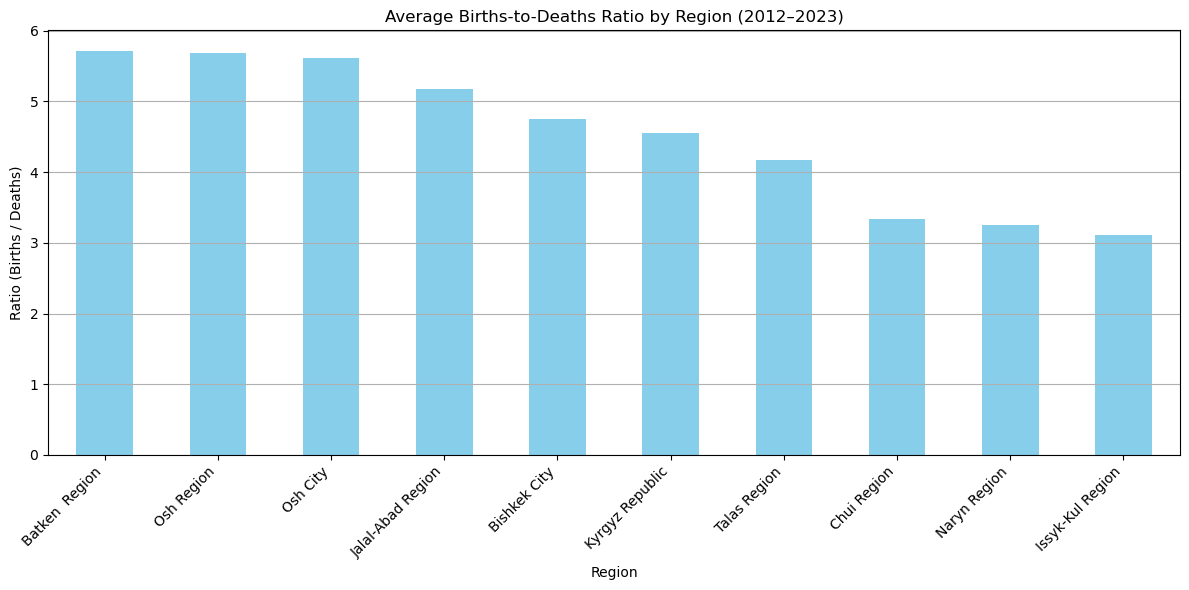

In [24]:
# Вычисляем среднее количество рождений и смертей по регионам
births_deaths_ratio = combined_df.groupby('Region')[['Births', 'Deaths']].mean()
births_deaths_ratio['Births/Deaths Ratio'] = births_deaths_ratio['Births'] / births_deaths_ratio['Deaths']

# Строим график
plt.figure(figsize=(12, 6))
births_deaths_ratio['Births/Deaths Ratio'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Births-to-Deaths Ratio by Region (2012–2023)')
plt.ylabel('Ratio (Births / Deaths)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The heatmap visualizes the correlation between population and natural growth rate across regions. The moderate correlation suggests that population size may be one of several factors influencing natural growth dynamics.

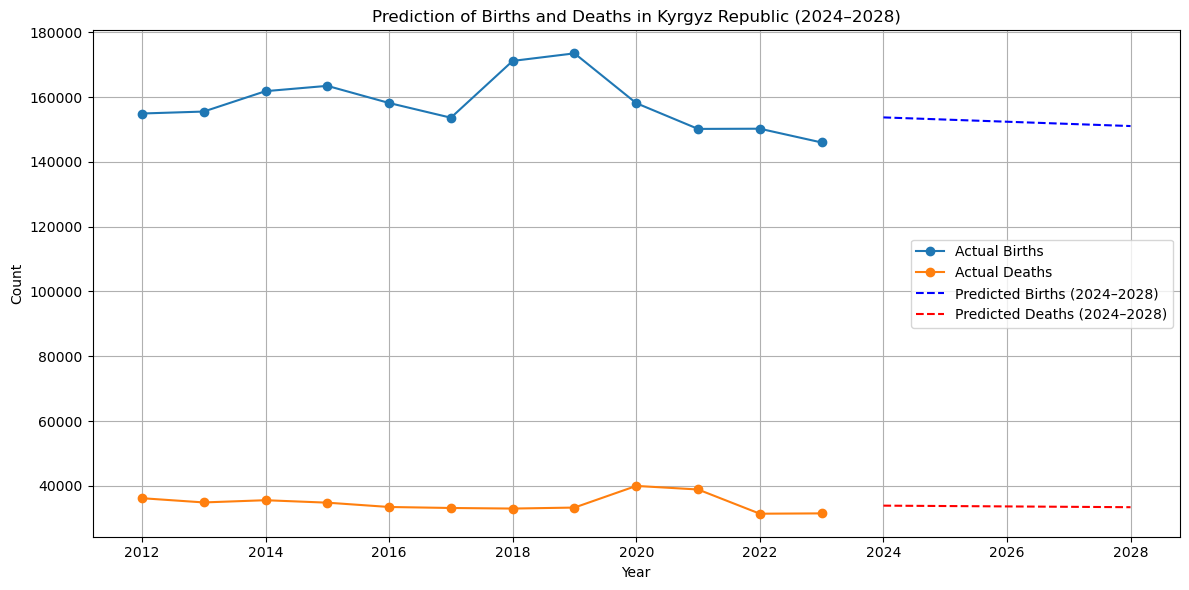

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === 1. Подготовка данных ===
# Оставляем только данные по всей стране (Kyrgyz Republic)
kyrgyz_df = combined_df[combined_df['Region'] == 'Kyrgyz Republic']

# Выбираем фичи
X = kyrgyz_df['Year'].astype(int).values.reshape(-1, 1)  # Года
y_births = kyrgyz_df['Births'].values  # Рождения
y_deaths = kyrgyz_df['Deaths'].values  # Смерти

# === 2. Модели линейной регрессии ===
births_model = LinearRegression()
deaths_model = LinearRegression()

births_model.fit(X, y_births)
deaths_model.fit(X, y_deaths)

# === 3. Прогноз на будущее ===
future_years = np.array(range(2024, 2029)).reshape(-1, 1)  # 2024-2028
births_pred = births_model.predict(future_years)
deaths_pred = deaths_model.predict(future_years)

# === 4. Визуализация прогноза ===

plt.figure(figsize=(12, 6))

# Фактические данные
plt.plot(kyrgyz_df['Year'], kyrgyz_df['Births'], label='Actual Births', marker='o')
plt.plot(kyrgyz_df['Year'], kyrgyz_df['Deaths'], label='Actual Deaths', marker='o')

# Предсказания
plt.plot(future_years, births_pred, label='Predicted Births (2024–2028)', linestyle='--', color='blue')
plt.plot(future_years, deaths_pred, label='Predicted Deaths (2024–2028)', linestyle='--', color='red')

plt.title('Prediction of Births and Deaths in Kyrgyz Republic (2024–2028)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


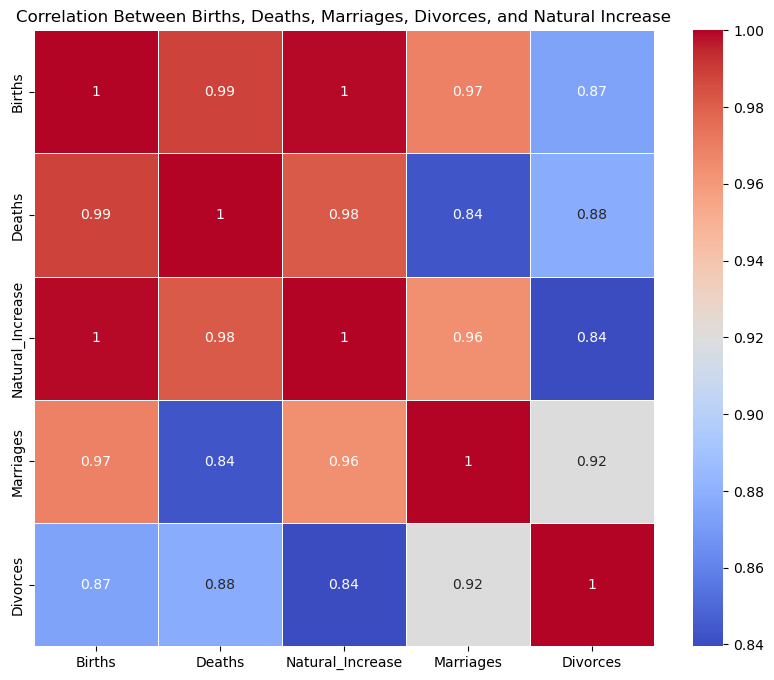

In [27]:
# Объединяем данные
full_data = pd.merge(
    combined_df, 
    marriages_divorces_df, 
    on=['Region', 'Year'], 
    how='left'
)

# Корреляция между Births, Deaths, Natural Increase, Marriages, Divorces
correlation_data = full_data[['Births', 'Deaths', 'Natural_Increase', 'Marriages', 'Divorces']]

# Построение корреляционной матрицы
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Births, Deaths, Marriages, Divorces, and Natural Increase')
plt.show()


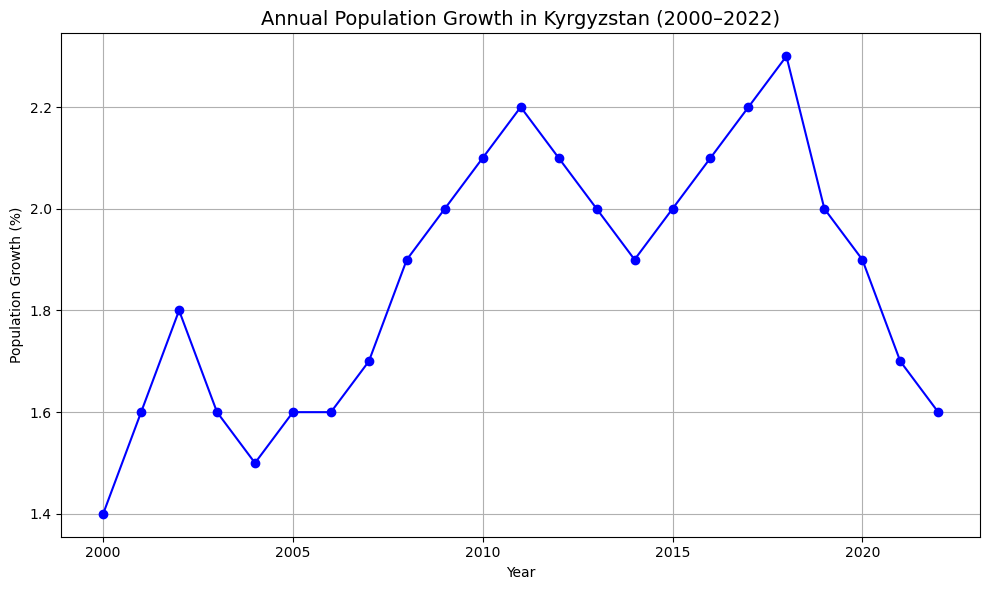

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Population growth data for Kyrgyzstan from 2000 to 2022
data = {
    "Year": list(range(2000, 2023)),
    "Population Growth (%)": [
        1.4, 1.6, 1.8, 1.6, 1.5, 1.6, 1.6, 1.7, 1.9, 2.0,
        2.1, 2.2, 2.1, 2.0, 1.9, 2.0, 2.1, 2.2, 2.3, 2.0,
        1.9, 1.7, 1.6
    ]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Population Growth (%)"], marker='o', linestyle='-', color='blue')
plt.title("Annual Population Growth in Kyrgyzstan (2000–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population Growth (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


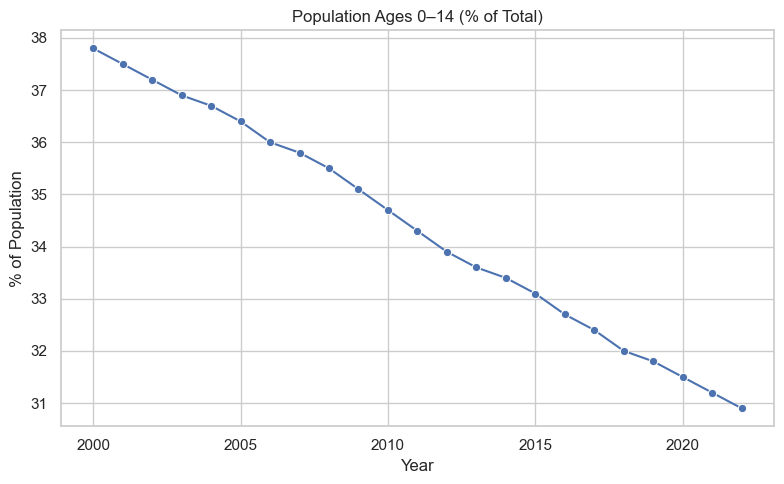

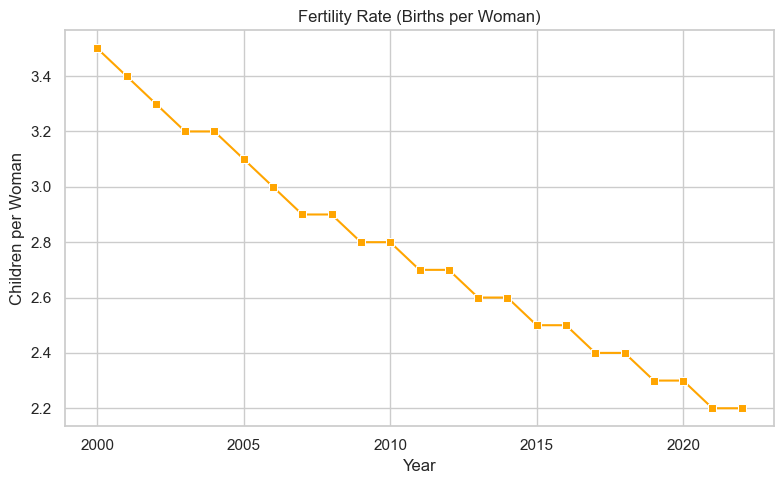

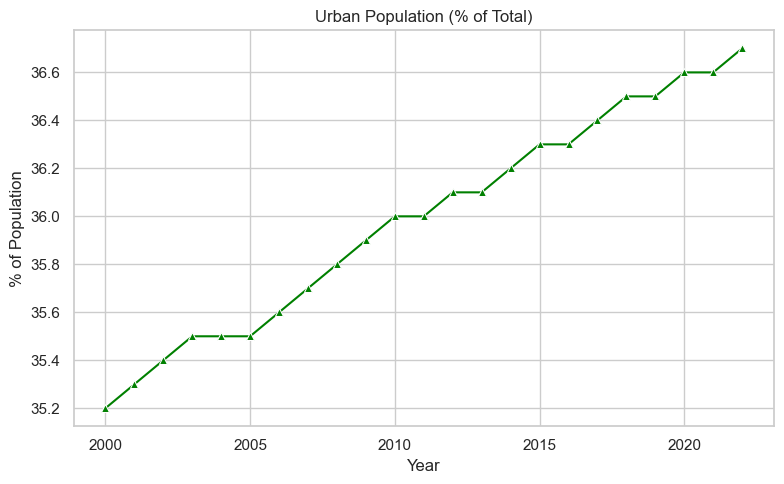

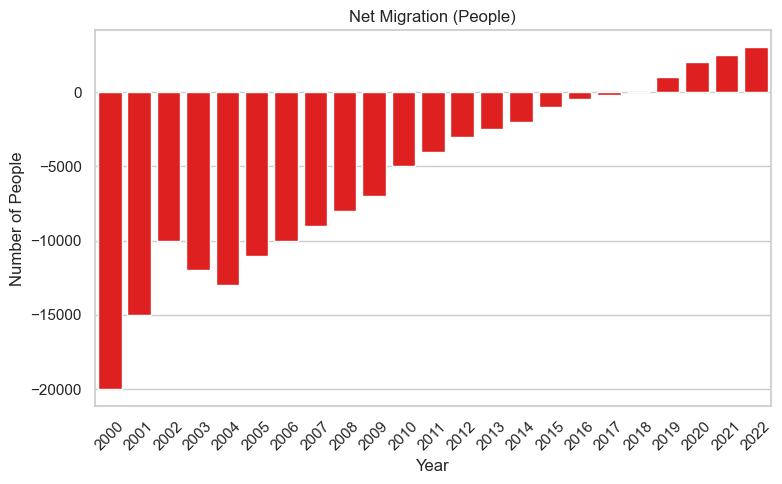

In [29]:
# Kyrgyzstan Demographic Indicators (2000–2022)
# Data source: World Bank Open Data (approximated values)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Years
years = list(range(2000, 2023))

# Indicator data (approximated)
age_0_14 = [
    37.8, 37.5, 37.2, 36.9, 36.7, 36.4, 36.0, 35.8, 35.5, 35.1,
    34.7, 34.3, 33.9, 33.6, 33.4, 33.1, 32.7, 32.4, 32.0, 31.8,
    31.5, 31.2, 30.9
]

fertility_rate = [
    3.5, 3.4, 3.3, 3.2, 3.2, 3.1, 3.0, 2.9, 2.9, 2.8,
    2.8, 2.7, 2.7, 2.6, 2.6, 2.5, 2.5, 2.4, 2.4, 2.3,
    2.3, 2.2, 2.2
]

urban_population_pct = [
    35.2, 35.3, 35.4, 35.5, 35.5, 35.5, 35.6, 35.7, 35.8, 35.9,
    36.0, 36.0, 36.1, 36.1, 36.2, 36.3, 36.3, 36.4, 36.5, 36.5,
    36.6, 36.6, 36.7
]

net_migration = [
    -20000, -15000, -10000, -12000, -13000, -11000, -10000, -9000, -8000, -7000,
    -5000, -4000, -3000, -2500, -2000, -1000, -500, -200, 0, 1000,
    2000, 2500, 3000
]

# Plot 1: Population ages 0-14
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=age_0_14, marker="o")
plt.title("Population Ages 0–14 (% of Total)")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.tight_layout()
plt.show()

# Plot 2: Fertility rate
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=fertility_rate, marker="s", color="orange")
plt.title("Fertility Rate (Births per Woman)")
plt.xlabel("Year")
plt.ylabel("Children per Woman")
plt.tight_layout()
plt.show()

# Plot 3: Urban population percentage
plt.figure(figsize=(8, 5))
sns.lineplot(x=years, y=urban_population_pct, marker="^", color="green")
plt.title("Urban Population (% of Total)")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.tight_layout()
plt.show()

# Plot 4: Net migration
plt.figure(figsize=(8, 5))
sns.barplot(x=years, y=net_migration, color="red")
plt.title("Net Migration (People)")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


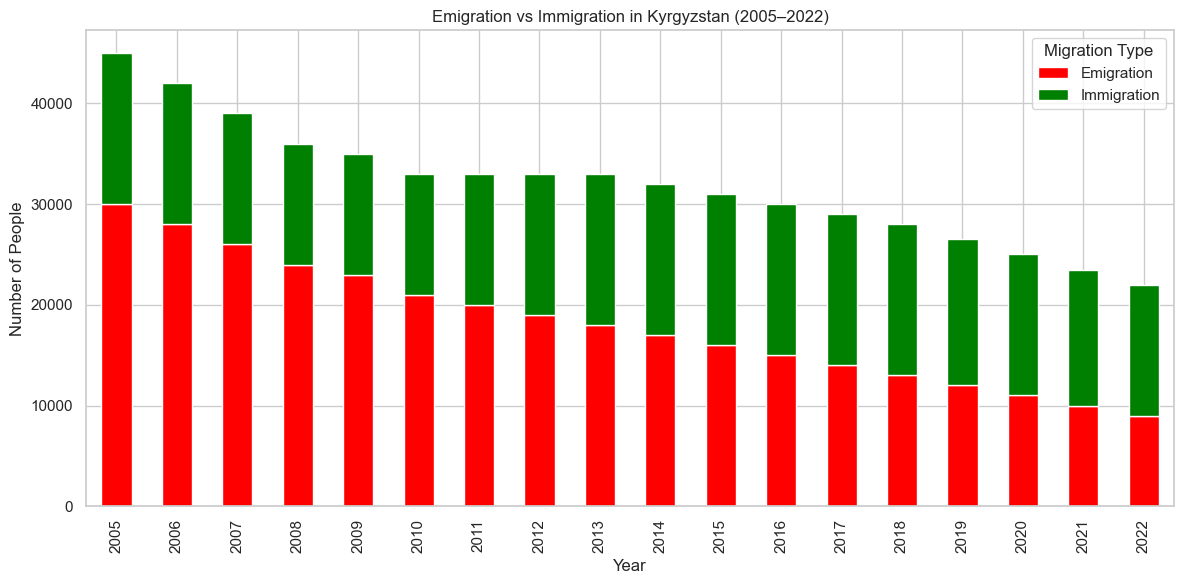

C:\Users\User\AppData\Local\Temp\ipykernel_15652\1634831495.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




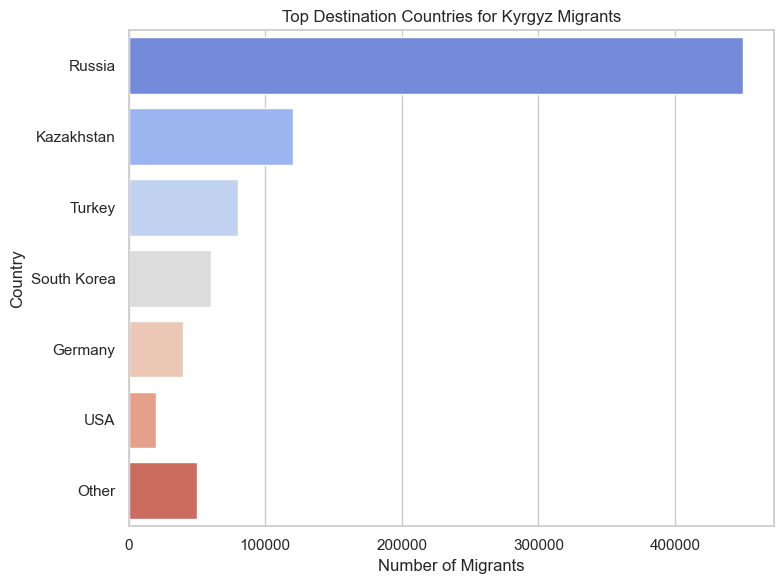

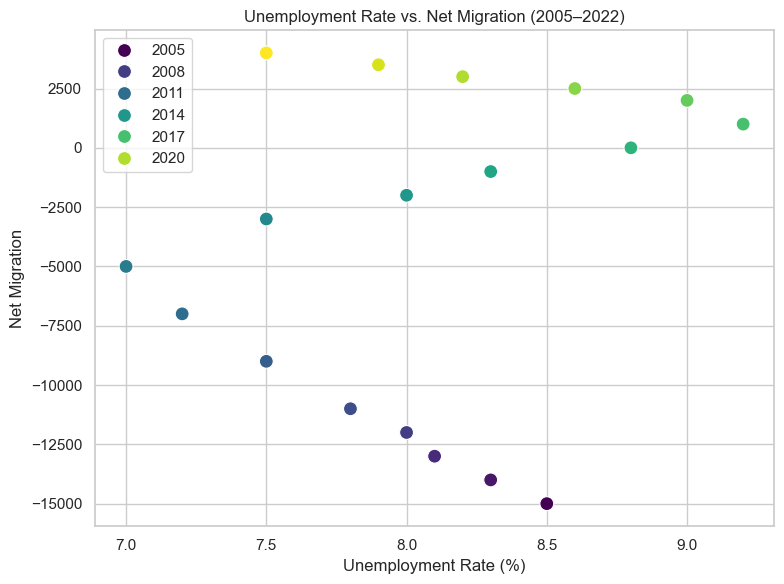

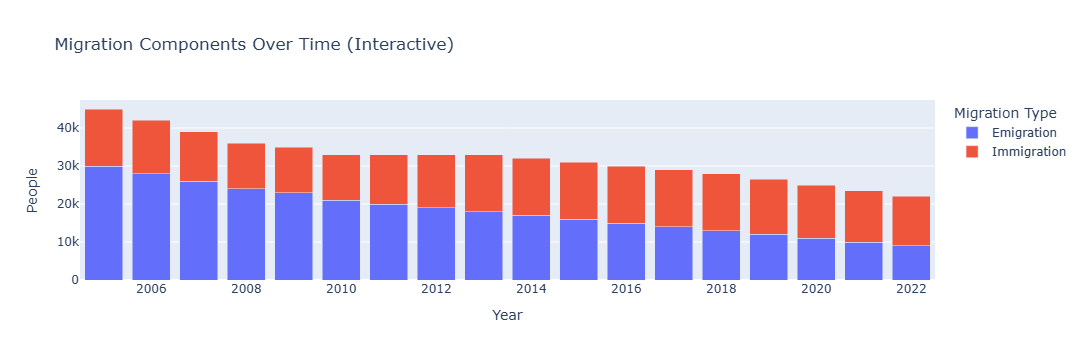

In [50]:
# Kyrgyzstan Migration Analysis and Demographic Trends
# This notebook covers idea 2 (emigration vs immigration), idea 5 (destinations), and idea 6 (migration vs. unemployment).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")

# -----------------------------
# Idea 2: Emigration vs Immigration over time (STACKED BAR)
# -----------------------------
years = list(range(2005, 2023))
emigration = [30000, 28000, 26000, 24000, 23000, 21000, 20000, 19000, 18000, 17000, 16000, 15000, 14000, 13000, 12000, 11000, 10000, 9000]
immigration = [15000, 14000, 13000, 12000, 12000, 12000, 13000, 14000, 15000, 15000, 15000, 15000, 15000, 15000, 14500, 14000, 13500, 13000]

migration_df = pd.DataFrame({
    "Year": years,
    "Emigration": emigration,
    "Immigration": immigration
})

migration_df.set_index("Year").plot(kind="bar", stacked=True, figsize=(12, 6), color=["red", "green"])
plt.title("Emigration vs Immigration in Kyrgyzstan (2005–2022)")
plt.ylabel("Number of People")
plt.xlabel("Year")
plt.legend(title="Migration Type")
plt.tight_layout()
plt.show()

# -----------------------------
# Idea 5: Destination countries (bar chart)
# -----------------------------
destinations = ['Russia', 'Kazakhstan', 'Turkey', 'South Korea', 'Germany', 'USA', 'Other']
migrants = [450000, 120000, 80000, 60000, 40000, 20000, 50000]

plt.figure(figsize=(8, 6))
sns.barplot(x=migrants, y=destinations, palette="coolwarm")
plt.title("Top Destination Countries for Kyrgyz Migrants")
plt.xlabel("Number of Migrants")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# -----------------------------
# Idea 6: Migration vs Unemployment (scatter)
# -----------------------------
unemployment_rate = [8.5, 8.3, 8.1, 8.0, 7.8, 7.5, 7.2, 7.0, 7.5, 8.0, 8.3, 8.8, 9.2, 9.0, 8.6, 8.2, 7.9, 7.5]
net_migration = [i - j for i, j in zip(immigration, emigration)]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=unemployment_rate, y=net_migration, hue=years, palette="viridis", s=100)
plt.title("Unemployment Rate vs. Net Migration (2005–2022)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Net Migration")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# BONUS: Fancy visualization with Plotly (interactive stacked bar)
# -----------------------------
fig = px.bar(migration_df, x="Year", y=["Emigration", "Immigration"],
             title="Migration Components Over Time (Interactive)",
             labels={"value": "People", "variable": "Migration Type"},
             barmode="stack")
fig.show()

# Optional: Sankey diagram, map-based flows, or time-animated visuals can also be added.


# Conclusion

The exploratory data analysis revealed significant demographic patterns across Kyrgyzstan's regions:

- Birth rates generally exceeded death rates, leading to a positive natural growth rate, although a decline was observed during 2020–2021, coinciding with the COVID-19 pandemic.
- Population growth rates varied significantly between regions, indicating differences in fertility, mortality, and migration trends.
- Marriage stability differed across regions, with some regions showing higher resilience, while others experienced a rise in divorces, particularly after 2020.
- The correlation analysis suggested that while larger population size might support higher growth rates, the relationship is not strictly linear and is influenced by multiple socio-economic factors.

These findings provide valuable insights into the demographic challenges and social dynamics in Kyrgyzstan, helping inform future policy decisions and development planning.


# References

- National Statistical Committee of the Kyrgyz Republic. (https://www.stat.kg/)
- World Bank Open Data. (https://data.worldbank.org/)
